In [78]:
!pip install nltk
!pip install wordcloud
!pip install spacy
!pip install eng-spacysentiment
!pip install textblob
!python -m spacy download en_core_web_sm

2024-06-28 21:56:07.965334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 21:56:07.965488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 21:56:07.977540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-28 21:56:10.468819: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [80]:
import re
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk import download
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
import numpy as np

In [82]:
from nltk import Text as nltk_text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import eng_spacysentiment

nlp = spacy.load('en_core_web_sm')

from textblob import TextBlob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from pymystem3 import Mystem

In [84]:
from pprint import pprint

In [85]:
new_stopwords = ['AI','intelligence', 'mit', 'MIT', 'robots', 'machine', 'learning', 'computer', 'model', 'datum', 'make','say', 'use',
                 'one', 'system', 'work', 'technology', 'take', 'news', 'fox', 'n', 'making', 'ai', 'artificial','robot','robotic','q',
                 'says','could', 'models','data', 'may', 'using','computing']

In [86]:
stop_words = stopwords.words('english')

In [87]:
stop_words = set(stop_words)

In [88]:
super_stop_words = stop_words.union(new_stopwords)

In [90]:
def clean_text(text_str, super_stop_words):
  text_str = text_str.lower()
  text_list_nltk = word_tokenize(text_str)
  text_clean = [word for word in text_list_nltk if word not in super_stop_words and word[0].isalpha()]
  return text_clean

**Анализ заголовков статей Fox News**

In [91]:
with open('fxn_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [95]:
full_fxn_headers_text = clean_text(text, super_stop_words)
print(full_fxn_headers_text[:100])

['headers', 'newsletter', 'reshaping', 'modern', 'warfare', 'lab', 'christian', 'university', 'aims', 'bring', 'morality', 'ethics', 'frequently', 'asked', 'questions', 'possibly', 'wiping', 'humanity', 'inconceivable', 'experts', 'share', 'biggest', 'innovations', 'landmark', "year'", 'gives', 'birth', 'scientists', 'capable', 'replicating', 'without', 'humans', 'gives', 'birth', 'scientists', 'capable', 'replicating', 'without', 'humans', 'dentistry', 'researchers', 'find', 'create', 'better', 'dental', 'crowns', 'comes', 'world', 'beauty', 'eyelash', 'uses', 'place', 'fake', 'lashes', 'proven', 'nasa', 'neurosurgery', 'remake', 'childhood', 'education', 'tech', 'exec', 'secret', 'better', 'sleep', 'dating', 'dating', 'app', 'founder', 'predicts', 'future', 'relationships', 'pentagon', 'seeks', 'low-cost', 'drones', 'bolster', 'air', 'force', 'companies', 'competing', 'opportunity', 'dangers', 'find', 'people', 'afraid', 'always', 'helpful', 'reducing', 'doctor', 'burnout', 'studies'

In [93]:
spacy_token_fxnh = []
for i in full_fxn_headers_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_fxnh.append(' '.join(sent))

In [96]:
spacy_token_fxnh

['header',
 'newsletter',
 'reshape',
 'modern',
 'warfare',
 'lab',
 'christian',
 'university',
 'aim',
 'bring',
 'morality',
 'ethic',
 'frequently',
 'ask',
 'question',
 'possibly',
 'wipe',
 'humanity',
 'inconceivable',
 'expert',
 'share',
 'big',
 'innovation',
 'landmark',
 "year '",
 'give',
 'birth',
 'scientist',
 'capable',
 'replicate',
 'without',
 'human',
 'give',
 'birth',
 'scientist',
 'capable',
 'replicate',
 'without',
 'human',
 'dentistry',
 'researcher',
 'find',
 'create',
 'well',
 'dental',
 'crown',
 'come',
 'world',
 'beauty',
 'eyelash',
 'use',
 'place',
 'fake',
 'lash',
 'prove',
 'nasa',
 'neurosurgery',
 'remake',
 'childhood',
 'education',
 'tech',
 'exec',
 'secret',
 'well',
 'sleep',
 'date',
 'date',
 'app',
 'founder',
 'predict',
 'future',
 'relationship',
 'pentagon',
 'seek',
 'low cost',
 'drone',
 'bolster',
 'air',
 'force',
 'company',
 'compete',
 'opportunity',
 'danger',
 'find',
 'people',
 'afraid',
 'always',
 'helpful',
 're

In [97]:
len(spacy_token_fxnh)

1967

**Подсчёт наиболее частотных слов, биграмм, построение облака слов**

In [98]:
from collections import Counter
Counter(spacy_token_fxnh).most_common(50)

[('google', 39),
 ('human', 26),
 ('new', 19),
 ('musk', 17),
 ('we', 16),
 ('elon', 16),
 ('predict', 15),
 ('pentagon', 12),
 ('expert', 11),
 ('use', 11),
 ('tech', 11),
 ('help', 11),
 ('facebook', 11),
 ('world', 10),
 ('study', 10),
 ('war', 10),
 ('warn', 10),
 ('china', 10),
 ('next', 10),
 ('newsletter', 9),
 ('go', 9),
 ('military', 9),
 ('researcher', 8),
 ('find', 8),
 ('well', 8),
 ('program', 8),
 ('project', 8),
 ('beat', 8),
 ('humanity', 7),
 ('fake', 7),
 ('drone', 7),
 ('cancer', 7),
 ('video', 7),
 ('think', 7),
 ('air', 6),
 ('force', 6),
 ('year', 6),
 ('not', 6),
 ('star', 6),
 ('fear', 6),
 ('report', 6),
 ('turn', 6),
 ('space', 6),
 ('develop', 6),
 ('trump', 6),
 ('bias', 6),
 ('tell', 6),
 ('header', 5),
 ('create', 5),
 ('exec', 5)]

In [99]:
frequencies_list = nltk.FreqDist(spacy_token_fxnh)

word_freq = dict((word, freq) for word, freq in frequencies_list.items() if not word.isdigit())

print(word_freq)

frequencies_list.most_common(50)

{'header': 5, 'newsletter': 9, 'reshape': 2, 'modern': 2, 'warfare': 3, 'lab': 3, 'christian': 1, 'university': 1, 'aim': 3, 'bring': 4, 'morality': 1, 'ethic': 1, 'frequently': 1, 'ask': 2, 'question': 1, 'possibly': 1, 'wipe': 1, 'humanity': 7, 'inconceivable': 1, 'expert': 11, 'share': 3, 'big': 4, 'innovation': 3, 'landmark': 1, "year '": 1, 'give': 3, 'birth': 2, 'scientist': 4, 'capable': 2, 'replicate': 3, 'without': 4, 'human': 26, 'dentistry': 1, 'researcher': 8, 'find': 8, 'create': 5, 'well': 8, 'dental': 1, 'crown': 1, 'come': 2, 'world': 10, 'beauty': 1, 'eyelash': 1, 'use': 11, 'place': 1, 'fake': 7, 'lash': 1, 'prove': 2, 'nasa': 3, 'neurosurgery': 1, 'remake': 1, 'childhood': 1, 'education': 2, 'tech': 11, 'exec': 5, 'secret': 3, 'sleep': 1, 'date': 2, 'app': 3, 'founder': 1, 'predict': 15, 'future': 5, 'relationship': 1, 'pentagon': 12, 'seek': 4, 'low cost': 1, 'drone': 7, 'bolster': 1, 'air': 6, 'force': 6, 'company': 5, 'compete': 2, 'opportunity': 1, 'danger': 3, '

[('google', 39),
 ('human', 26),
 ('new', 19),
 ('musk', 17),
 ('we', 16),
 ('elon', 16),
 ('predict', 15),
 ('pentagon', 12),
 ('expert', 11),
 ('use', 11),
 ('tech', 11),
 ('help', 11),
 ('facebook', 11),
 ('world', 10),
 ('study', 10),
 ('war', 10),
 ('warn', 10),
 ('china', 10),
 ('next', 10),
 ('newsletter', 9),
 ('go', 9),
 ('military', 9),
 ('researcher', 8),
 ('find', 8),
 ('well', 8),
 ('program', 8),
 ('project', 8),
 ('beat', 8),
 ('humanity', 7),
 ('fake', 7),
 ('drone', 7),
 ('cancer', 7),
 ('video', 7),
 ('think', 7),
 ('air', 6),
 ('force', 6),
 ('year', 6),
 ('not', 6),
 ('star', 6),
 ('fear', 6),
 ('report', 6),
 ('turn', 6),
 ('space', 6),
 ('develop', 6),
 ('trump', 6),
 ('bias', 6),
 ('tell', 6),
 ('header', 5),
 ('create', 5),
 ('exec', 5)]

**График наиболее частотных слов**

In [102]:
def plot_word_frequency(words,top_n=10):
    word_freq = nltk.FreqDist(spacy_token_fxnh)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(50, 5))
    plt.title("Самые частые слова в корпусе")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(x=labels, y=counts)
    return plot

<Axes: title={'center': 'Самые частые слова в корпусе'}, xlabel='Word', ylabel='Count'>

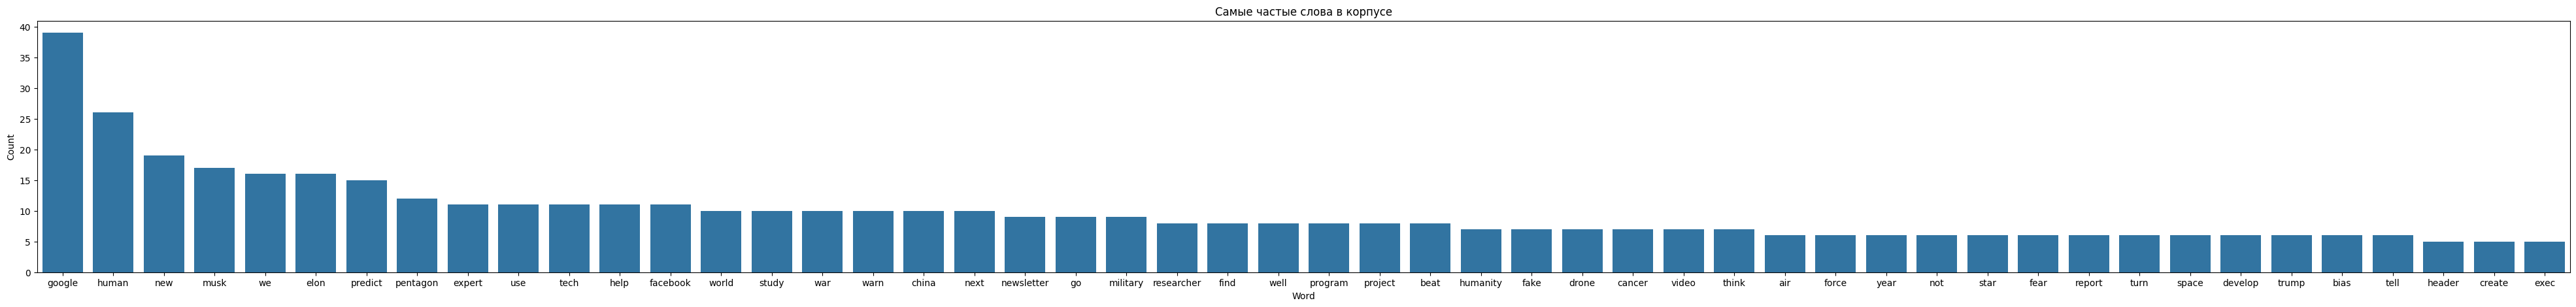

In [103]:
plot_word_frequency(spacy_token_fxnh,50)

**Облако слов**

In [35]:
from wordcloud import WordCloud
%matplotlib inline

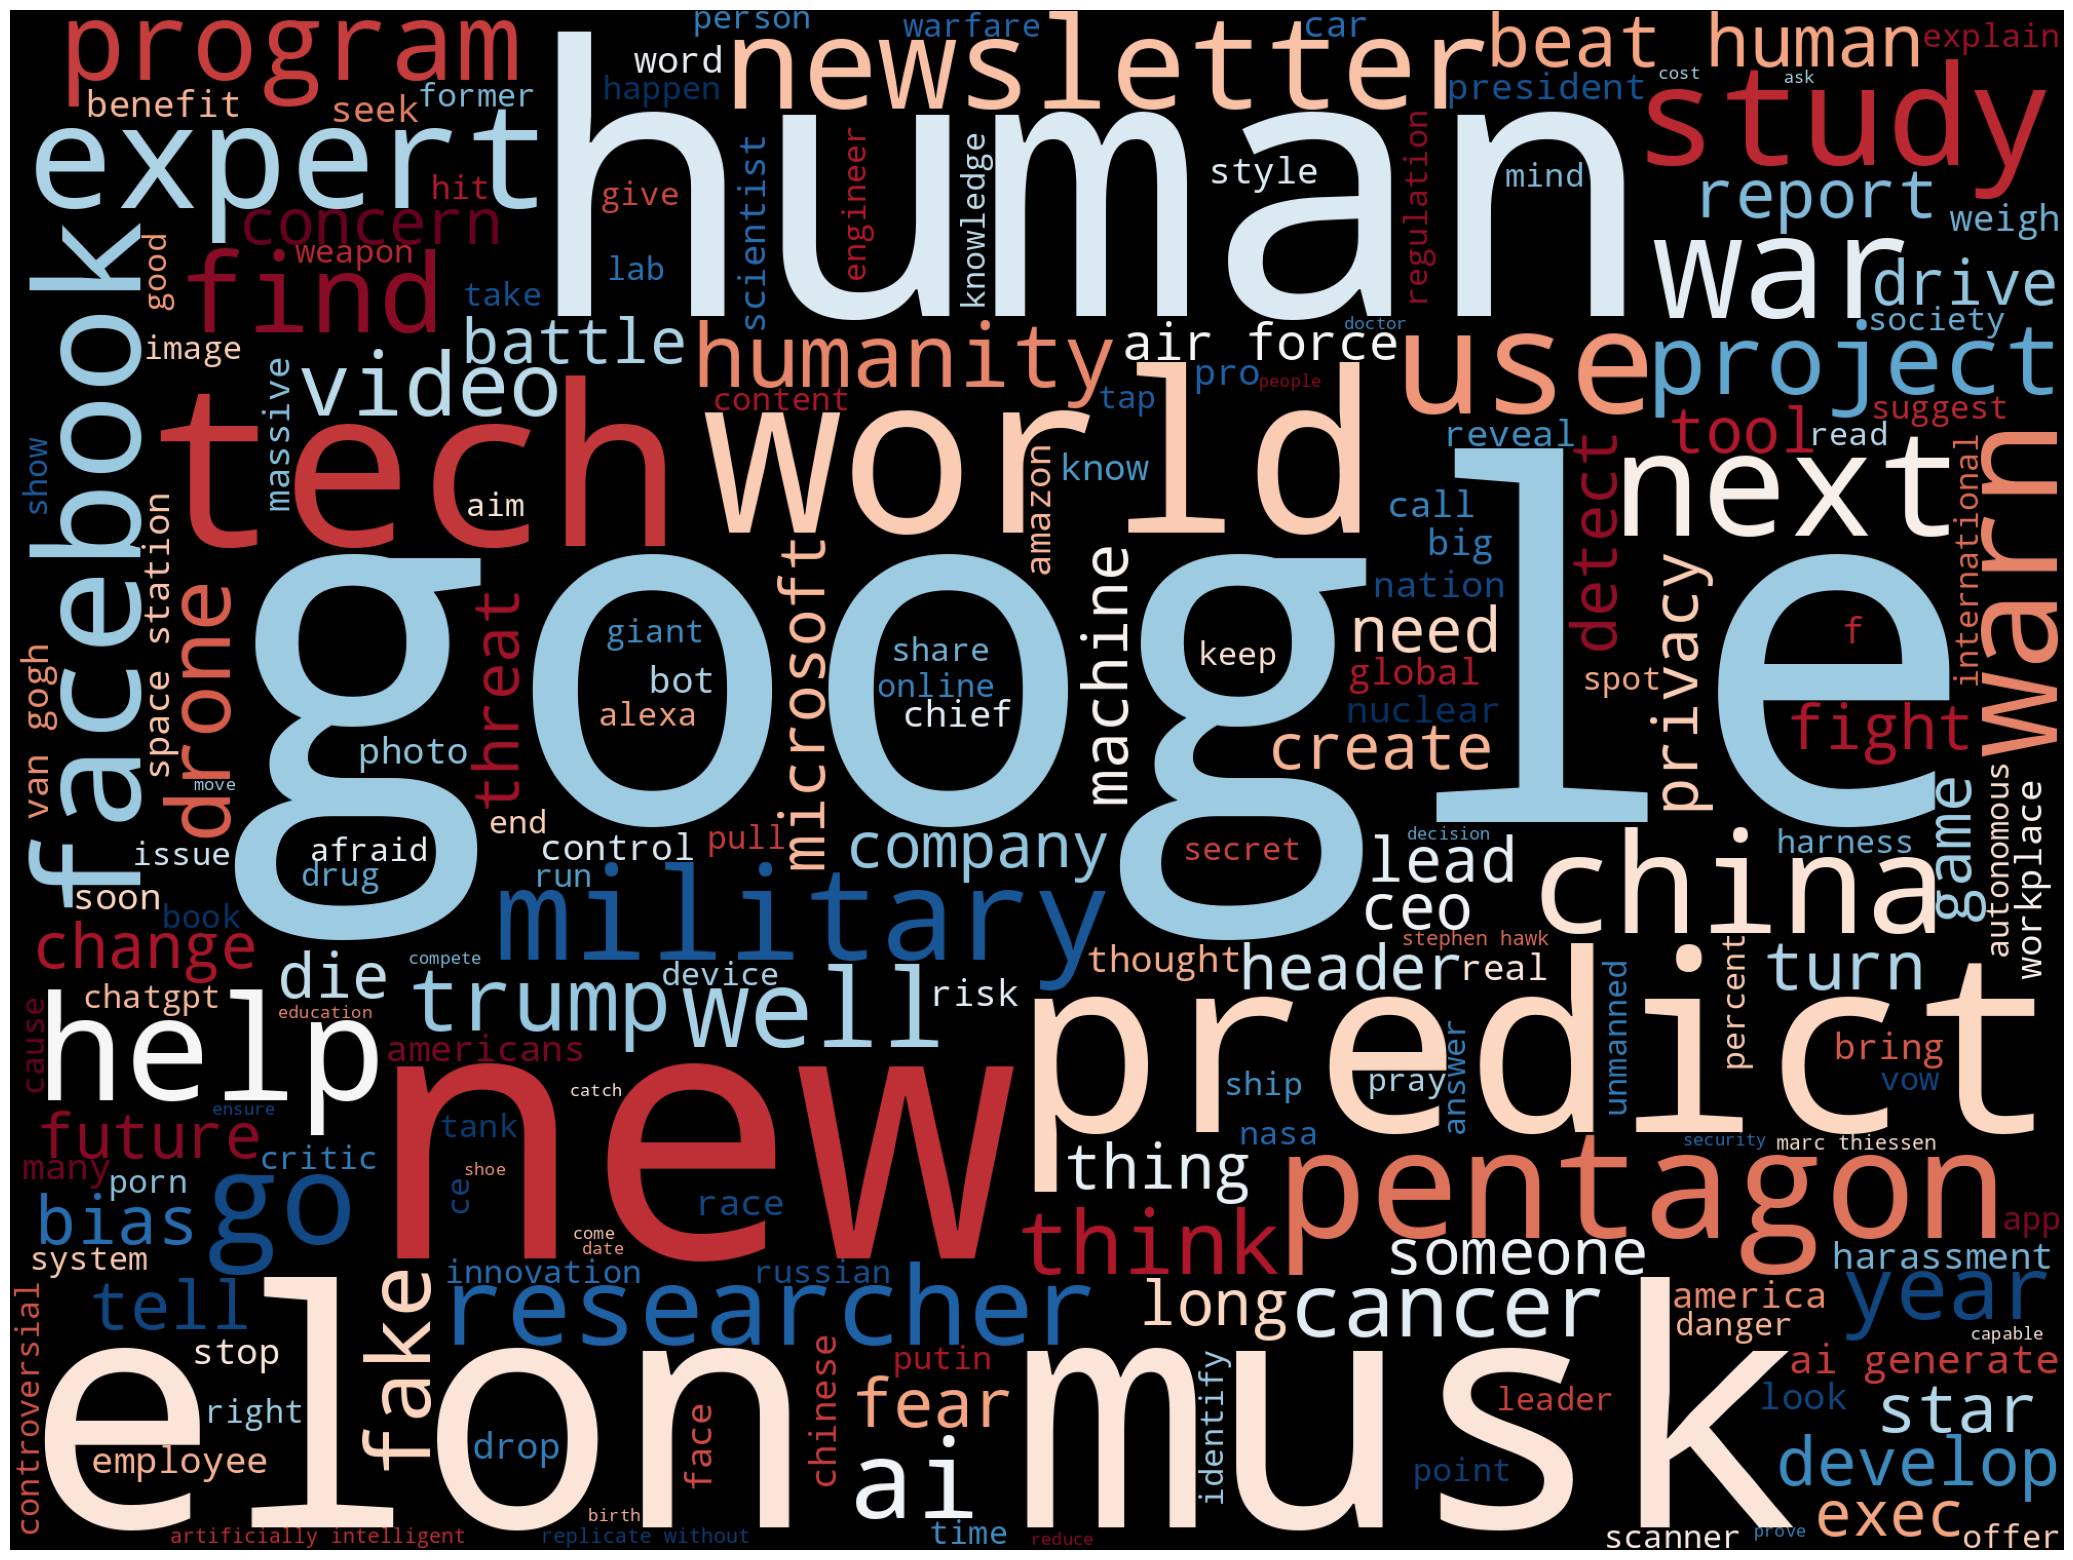

In [104]:
wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      background_color='black',
                      colormap='RdBu').generate(', '.join(spacy_token_fxnh))
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Биграммы**

In [105]:
freq_bigramms = Counter(nltk.bigrams(spacy_token_fxnh))
freq_bigramms.most_common(10)

[(('elon', 'musk'), 16),
 (('beat', 'human'), 7),
 (('air', 'force'), 5),
 (('space', 'station'), 4),
 (('we', 'military'), 4),
 (('van', 'gogh'), 4),
 (('replicate', 'without'), 3),
 (('without', 'human'), 3),
 (('study', 'find'), 3),
 (('marc', 'thiessen'), 3)]

In [38]:
freq_bigramms = Counter(nltk.bigrams(full_fxn_headers_text))
freq_bigramms.most_common(10)

[(('elon', 'musk'), 16),
 (('air', 'force'), 5),
 (('beats', 'human'), 5),
 (('space', 'station'), 4),
 (('us', 'military'), 4),
 (('van', 'gogh'), 4),
 (('without', 'humans'), 3),
 (('study', 'finds'), 3),
 (('marc', 'thiessen'), 3),
 (('program', 'report'), 3)]

**Выявление коллокаций (PMI, log-likelihood, tf-idf)**

In [106]:
def sentenize(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def normalize(text):
    doc = nlp(text)
    list_of_lemmas = ' '.join([tok.lemma_ for tok in doc])
    tokens = re.findall('[a-zA-Z0-9]+', list_of_lemmas.lower())
    normalized_text = [word for word in tokens if len(word) > 2 and word not in super_stop_words]

    return normalized_text

def preprocess(text):
    sents = sentenize(text)
    return [normalize(sent) for sent in sents]

In [107]:
with open('fxn_headers.txt', encoding='utf-8') as text:
    corpus = text.read()

In [108]:
corpus = preprocess(corpus)

In [109]:
corpus

[['header'],
 ['newsletter',
  'reshape',
  'modern',
  'warfare',
  'lab',
  'christian',
  'university',
  'aim',
  'bring',
  'morality',
  'ethic',
  'frequently',
  'ask',
  'question',
  'godfather',
  'possibly',
  'wipe',
  'humanity',
  'inconceivable',
  'expert',
  'share',
  'big',
  'innovation',
  '2023',
  'landmark',
  'year',
  'give',
  'birth'],
 ['scientist', 'capable', 'replicate', 'without', 'human', 'give', 'birth'],
 ['scientist',
  'capable',
  'replicate',
  'without',
  'human',
  'dentistry',
  'researcher',
  'find',
  'create',
  'well',
  'dental',
  'crown',
  'come',
  'world',
  'beauty',
  'eyelash',
  'place',
  'fake',
  'lash',
  'prove',
  'nasa',
  'neurosurgery',
  'remake',
  'childhood',
  'education',
  'tech',
  'exec',
  'secret',
  'well',
  'sleep'],
 ['date'],
 ['date',
  'app',
  'founder',
  'predict',
  'future',
  'relationship',
  'pentagon',
  'seek',
  'low',
  'cost',
  'drone',
  'bolster',
  'air',
  'force',
  'company',
  'co

In [110]:
def ngrammer(tokens, stops, n=2):
    ngrams = []
    tokens = [token for token in tokens if token not in super_stop_words]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

In [111]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))

    except ZeroDivisionError:
        return 0

    return score

def collect_stats(corpus, stops):

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, super_stop_words, 2))

    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=1):
    bigram2score = Counter()
    len_vocab = len(unigrams)
    for bigram in bigrams:
        score = scorer(unigrams[bigram[0]], unigrams[bigram[1]],
                       bigrams[bigram], len_vocab, min_count)

        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

In [112]:
unigrams, bigrams = collect_stats(corpus, super_stop_words)

In [113]:
bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)
bigram2score
bigram2score.most_common(20)

[(('reshape', 'modern'), 0.5),
 (('christian', 'university'), 0.5),
 (('morality', 'ethic'), 0.5),
 (('ethic', 'frequently'), 0.5),
 (('question', 'godfather'), 0.5),
 (('godfather', 'possibly'), 0.5),
 (('possibly', 'wipe'), 0.5),
 (('2023', 'landmark'), 0.5),
 (('dental', 'crown'), 0.5),
 (('beauty', 'eyelash'), 0.5),
 (('eyelash', 'place'), 0.5),
 (('neurosurgery', 'remake'), 0.5),
 (('remake', 'childhood'), 0.5),
 (('always', 'helpful'), 0.5),
 (('four', 'main'), 0.5),
 (('main', 'type'), 0.5),
 (('government', 'mouthpiece'), 0.5),
 (('beijing', 'ramp'), 0.5),
 (('hire', 'spree'), 0.5),
 (('capability', 'battlefield'), 0.5)]

In [114]:
from collections import defaultdict
def get_window_stats(texts, window=4):

    bigrams = defaultdict(list)

    for text in texts:
        for i in range(len(text)-window):
            words = list(enumerate(text[i:i+window]))
            target = words[0][1]
            for j, word in words[1:]:
                bigrams[(target, word)].append(j)

    bigrams_stds = Counter()
    for bigram in bigrams:
        if len(bigrams[bigram]) > 2:
            bigrams_stds[bigram] = np.std(bigrams[bigram])

    return bigrams_stds

In [115]:
get_window_stats(corpus)

Counter({('replicate', 'without'): 0.0,
         ('replicate', 'human'): 0.0,
         ('air', 'force'): 0.0,
         ('marc', 'thiessen'): 0.0,
         ('pentagon', 'massive'): 0.4714045207910317,
         ('pentagon', 'new'): 0.4714045207910317,
         ('massive', 'new'): 0.0,
         ('google', 'new'): 0.0,
         ('pentagon', 'project'): 0.8660254037844386,
         ('google', 'project'): 0.4714045207910317,
         ('elon', 'musk'): 0.0,
         ('beat', 'human'): 0.0,
         ('controversial', 'project'): 0.4714045207910317,
         ('military', 'program'): 0.5,
         ('google', 'employee'): 0.0,
         ('google', 'ceo'): 0.9428090415820634,
         ('drop', 'pentagon'): 0.9428090415820634,
         ('google', 'predict'): 0.0,
         ('predict', 'die'): 0.5,
         ('space', 'station'): 0.0,
         ('look', 'like'): 0.0,
         ('like', 'elon'): 0.816496580927726,
         ('google', 'military'): 0.4714045207910317,
         ('google', 'program'): 1.0,
  

In [116]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [117]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [118]:
finder = BigramCollocationFinder.from_documents(corpus)

In [119]:
finder.nbest(bigram_measures.likelihood_ratio, 20)

[('elon', 'musk'),
 ('air', 'force'),
 ('van', 'gogh'),
 ('beat', 'human'),
 ('space', 'station'),
 ('marc', 'thiessen'),
 ('stephen', 'hawking'),
 ('artificially', 'intelligent'),
 ('replicate', 'without'),
 ('look', 'like'),
 ('15th', 'century'),
 ('alex', 'garland'),
 ('apple', 'tim'),
 ('best', 'champ'),
 ('block', 'terrorist'),
 ('body', 'mri'),
 ('boost', 'block'),
 ('century', 'manuscript'),
 ('champ', 'final'),
 ('character', 'finally')]

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
texts = [' '.join(sent) for sent in corpus]

In [122]:
tfidf = TfidfVectorizer(min_df=2, max_df=50, max_features=1000,
                       ngram_range=(2,2))

In [123]:
tfidf.fit(texts)

TfidfVectorizer(max_df=50, max_features=1000, min_df=2, ngram_range=(2, 2))

In [124]:
tfidf.vocabulary_

{'reshape modern': 212,
 'modern warfare': 157,
 'give birth': 98,
 'scientist capable': 219,
 'capable replicate': 34,
 'replicate without': 211,
 'without human': 280,
 'tech exec': 247,
 'air force': 4,
 'study suggest': 241,
 'find future': 88,
 'catch cancer': 36,
 'cancer symptom': 32,
 'symptom ezra': 244,
 'ezra full': 80,
 'full body': 90,
 'body mri': 27,
 'mri scanner': 159,
 'scanner shoe': 218,
 'company aim': 47,
 'aim accessorize': 3,
 'accessorize everything': 1,
 'study find': 240,
 'kamala harris': 135,
 'attempt explain': 16,
 'generate covid': 96,
 'covid drug': 51,
 'drug enter': 71,
 'clinical trial': 46,
 'marc thiessen': 148,
 'program report': 200,
 'sam altman': 216,
 'existential threat': 79,
 'long term': 142,
 'pentagon approach': 182,
 'approach massive': 14,
 'massive new': 150,
 'new breakthrough': 167,
 'help military': 118,
 'former google': 89,
 'chief warn': 44,
 'lung cancer': 144,
 'elon musk': 72,
 'create video': 52,
 'scientist develop': 220,
 '

**Выделение прилагательных и наречий**

In [125]:
from nltk import pos_tag

In [126]:
with open('fxn_headers.txt', 'r', encoding='utf-8') as file:
        text = file.read()

In [127]:
words = word_tokenize(text)

pos_tagged = pos_tag(words)

adjectives = [word for (word, pos) in pos_tagged if pos in ['JJ', 'JJR', 'JJS']]

In [130]:
pprint(Counter(adjectives).most_common(50))

[('artificial', 98),
 ('Artificial', 16),
 ('new', 15),
 ('human', 10),
 ('next', 10),
 ('military', 9),
 ('fake', 7),
 ('more', 6),
 ('better', 5),
 ('future', 4),
 ('global', 4),
 ('nuclear', 4),
 ('massive', 4),
 ('’', 3),
 ('Chinese', 3),
 ('AI-generated', 3),
 ('real', 3),
 ('‘', 3),
 ('controversial', 3),
 ('big', 3),
 ('autonomous', 3),
 ('intelligent', 3),
 ('modern', 2),
 ('capable', 2),
 ('full-body', 2),
 ('likely', 2),
 ('clinical', 2),
 ('ready', 2),
 ('AI-powered', 2),
 ('single', 2),
 ('much', 2),
 ('long-term', 2),
 ('unmanned', 2),
 ('major', 2),
 ('expert', 2),
 ('social', 2),
 ('psychopathic', 2),
 ('many', 2),
 ('difficult', 2),
 ('secret', 2),
 ('hard', 2),
 ('incredible', 2),
 ('belligerent', 2),
 ('tank', 2),
 ('evil', 2),
 ('sexual', 2),
 ('panic', 2),
 ('pull', 2),
 ('own', 2),
 ("'biggest", 2)]


In [131]:
adverbs = [word for (word, pos) in pos_tagged if pos in ['RB', 'RBR', 'RBS']]

In [132]:
pprint(Counter(adverbs).most_common(50))

[('not', 7),
 ('now', 7),
 ("n't", 6),
 ('soon', 4),
 ('Here', 3),
 ('ever', 2),
 ('just', 2),
 ('about', 2),
 ('better', 2),
 ('right', 2),
 ('most', 2),
 ('as', 2),
 ('finally', 2),
 ('really', 2),
 ('longer', 2),
 ('artificially', 2),
 ('Frequently', 1),
 ('possibly', 1),
 ('proven', 1),
 ('always', 1),
 ('outsmart', 1),
 ('already', 1),
 ('ahead', 1),
 ("'Desperately", 1),
 ('so', 1),
 ('long', 1),
 ('truly', 1),
 ('ta', 1),
 ('well', 1),
 ('never', 1),
 ('closer', 1),
 ('‘', 1),
 ('more', 1),
 ("'potentially", 1),
 ('elsewhere', 1),
 ('politically', 1),
 ('first', 1),
 ('else', 1),
 ('reportedly', 1),
 ('earlier', 1),
 ('again', 1),
 ('15th-century', 1),
 ('eventually', 1),
 ('smarter', 1),
 ('even', 1)]


**Анализ тональности**

In [133]:
with open('fxn_headers.txt', 'r', encoding='utf-8') as f:
  text = f.read()

text = text.split('\n')
text

['headers',
 'What is artificial intelligence (AI)?',
 'Fox News AI Newsletter: How artificial intelligence is reshaping modern warfare',
 'AI lab at Christian university aims to bring morality and ethics to artificial intelligence',
 'Artificial intelligence: Frequently asked questions about AI',
 "Artificial intelligence 'godfather' on AI possibly wiping out humanity: ‘It's not inconceivable’",
 "Artificial intelligence experts share 6 of the biggest AI innovations of 2023: 'A landmark year'",
 'AI gives birth to AI: Scientists say machine intelligence now capable of replicating without humans',
 'AI gives birth to AI: Scientists say machine intelligence now capable of replicating without humans',
 'AI in dentistry: Researchers find that artificial intelligence can create better dental crowns',
 'AI comes to the world of beauty as eyelash robot uses artificial intelligence to place fake lashes',
 'Artificial intelligence, proven at NASA and in neurosurgery, could remake childhood edu

In [134]:
def get_clean_tokens(text):
  text = text.lower()
  text_tokens = word_tokenize(text)
  clean_tokens = []
  for i in text_tokens:
    if i[0].isalpha() and i not in stop_words:
      clean_tokens.append(i)
  return clean_tokens

clean_text = []
for i in text:
  sent = get_clean_tokens(i)
  clean_text.append(' '.join(sent))
clean_text

['headers',
 'artificial intelligence ai',
 'fox news ai newsletter artificial intelligence reshaping modern warfare',
 'ai lab christian university aims bring morality ethics artificial intelligence',
 'artificial intelligence frequently asked questions ai',
 'artificial intelligence ai possibly wiping humanity inconceivable',
 'artificial intelligence experts share biggest ai innovations landmark year',
 'ai gives birth ai scientists say machine intelligence capable replicating without humans',
 'ai gives birth ai scientists say machine intelligence capable replicating without humans',
 'ai dentistry researchers find artificial intelligence create better dental crowns',
 'ai comes world beauty eyelash robot uses artificial intelligence place fake lashes',
 'artificial intelligence proven nasa neurosurgery could remake childhood education says tech exec',
 'artificial intelligence secret better sleep',
 'dating ai artificial intelligence dating app founder predicts future ai relations

In [135]:
nlp = spacy.load("en_core_web_sm")

spacy_token_fxnh = []
for i in clean_text:
  doc = nlp(i)
  sent = []
  for token in doc:
    if token.lemma_ != '-' and token.lemma_ != '.':
      sent.append(token.lemma_)
  spacy_token_fxnh.append(' '.join(sent))

In [136]:
spacy_token_fxnh

['header',
 'artificial intelligence ai',
 'fox news ai newsletter artificial intelligence reshape modern warfare',
 'ai lab christian university aim bring morality ethic artificial intelligence',
 'artificial intelligence frequently ask question ai',
 'artificial intelligence ai possibly wipe humanity inconceivable',
 'artificial intelligence expert share big ai innovation landmark year',
 'ai give birth ai scientist say machine intelligence capable replicating without human',
 'ai give birth ai scientist say machine intelligence capable replicating without human',
 'ai dentistry researcher find artificial intelligence create well dental crown',
 'ai come world beauty eyelash robot use artificial intelligence place fake lash',
 'artificial intelligence prove nasa neurosurgery could remake childhood education say tech exec',
 'artificial intelligence secret well sleep',
 'date ai artificial intelligence date app founder predict future ai relationship',
 'pentagon seek low cost ai drone

In [137]:
df = pd.DataFrame(spacy_token_fxnh[1:], columns=['header'])
df

,header
0,artificial intelligence ai
1,fox news ai newsletter artificial intelligence...
2,ai lab christian university aim bring morality...
3,artificial intelligence frequently ask questio...
4,artificial intelligence ai possibly wipe human...
...,...
311,ibm computer tap ai successfully debate human
312,gen anthony tata one reason beware emerge chin...
313,researcher create video game mario think
314,marc thiessen shame google treat we military evil


**Sentiment analysis с помощью spacy**

In [138]:
nlp = eng_spacysentiment.load()

spacy_pos = []
spacy_neg = []
for i in df.header:
  doc = nlp(i)
  spacy_pos.append(round(doc.cats['positive'], 5))
  spacy_neg.append(round(doc.cats['negative'], 5))

df['spacy_pos'] = spacy_pos
df['spacy_neg'] = spacy_neg
df

,header,spacy_pos,spacy_neg
0,artificial intelligence ai,0.27172,0.08447
1,fox news ai newsletter artificial intelligence...,0.25927,0.22920
2,ai lab christian university aim bring morality...,0.13511,0.15312
3,artificial intelligence frequently ask questio...,0.35774,0.07688
4,artificial intelligence ai possibly wipe human...,0.33473,0.08136
...,...,...,...
311,ibm computer tap ai successfully debate human,0.87471,0.01947
312,gen anthony tata one reason beware emerge chin...,0.05554,0.88259
313,researcher create video game mario think,0.48142,0.13887
314,marc thiessen shame google treat we military evil,0.05446,0.79045


**Sentiment analysis с помощью Textblob**

In [139]:
blob_polar = []
blob_subj = []
for i in df.header:
  analysis = TextBlob(i).sentiment
  blob_polar.append(round(analysis[0], 5))
  blob_subj.append(round(analysis[1], 5))

df['blob_polar'] = blob_polar
df['blob_subj'] = blob_subj
df

,header,spacy_pos,spacy_neg,blob_polar,blob_subj
0,artificial intelligence ai,0.27172,0.08447,-0.600,1.000
1,fox news ai newsletter artificial intelligence...,0.25927,0.22920,-0.200,0.650
2,ai lab christian university aim bring morality...,0.13511,0.15312,-0.300,0.500
3,artificial intelligence frequently ask questio...,0.35774,0.07688,-0.250,0.650
4,artificial intelligence ai possibly wipe human...,0.33473,0.08136,-0.300,1.000
...,...,...,...,...,...
311,ibm computer tap ai successfully debate human,0.87471,0.01947,0.375,0.525
312,gen anthony tata one reason beware emerge chin...,0.05554,0.88259,0.000,0.000
313,researcher create video game mario think,0.48142,0.13887,-0.400,0.400
314,marc thiessen shame google treat we military evil,0.05446,0.79045,-0.550,0.550
